<h1>Airbnb Data Analysis for Newyork</h1>


<h3>Team - Prajwal Gadad, Divya Natolana Ganapathy</h3>
<h4>Introduction:</h4> Airbnb is a popular room sharing application used by people to book rooms.We chose Airbnb Data for our analysis because this was something we could easily relate to.We have used New York data because thats the closest place to umbc for which we could get airbnb data for.
Our data source is "Inside Airbnb", the size of our data was around 1 GB.
We grabbed the data available as of October 2018.
We downloaded multiple datasets for Newyork such as hosts.csv, listing.csv, reviews.csv, calendar.csv.
We were successful in analysing the reasons for the prices of expensive lisitings. We also were able to provide use full insight for a new host if he wants to list out his room on Airbnb based on the previous trends that were observered. 




<h4>Overview of the data set:</h4>
We used the listings.csv file and the reviews.csv file from the list of available datasets from Airbnb. To create the final dataset that we used in this project, we merged the above listed csv files with respect to their ID's using merge function in pandas. Our lisitings data set contains about 50041 rows X 96 columns  where we filtered the data as and when we needed. Reviews file contains 1051974 rows X 5 columns named (id, date, reviewer_id, reviewer_name, comments). We came to know that the data set contains alot of nan values and negative data. There were instances where we found alot of missing values, which we had to carefully substitute with a mean value or a median value according to the requirement of the task to be achieved.

<h4>Negative Results:</h4> 
Yes there were instances where we had negative results like we couldn't find the relationship between neighbour hood group and the prices of the listings. We also failed with the linear regression model where we got a variance score of 0.34 which was not as expected. We tried finding out the relationship between neighbourhood group and the type of the host. (If he is a super host or not)We found out that there is no such relation between neighbourhood group and the type of the host.

<h4>The whole notebook has been divided into two parts as follows:</h4>
<h5>Analysis Part-I (Price Analysis):</h5> <i>It is the analysis of the prices of the listings on the Airbnb for Newyork area. We have tried to find out why a particular listing on the airbnb is expensive, what are the factors effecting their price and displayed them using various visualisation tools.</i>
<h5>Analysis Part-II (Host Analysis):</h5><i>In this analysis we have tried to answer the following questions.How a host is doing? What are the ways that a host can become a super host? What are the reasons for the success of a host? We have also calculated the total estimated amount a host can make in a span of one year. Along with that we have made use of a Random forest regressor to predict what amount of money can a new host earn in one year given his room type, amenities, number of bedrooms, location. We have also showed the keywords used by successful hosts used in their description. A new user can get to know what keywords he should use in his description if he know what is his target auidience. The target auidience we have considered are audience interested in location, luxury and budget.</i>

<h3>Analysis Part - I  (Price Analysis)</h3> 
Analysis from Customer's Point of View. <br>
Lets find out what is it that makes one listing more expensive than another one.

Let's load the listings_detailed.csv in a data frame.

In [1]:
import pandas as pd
import numpy as np
listing_detailed = pd.read_csv('listings_detailed.csv')

C:\Users\prajw\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (43,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Lets get the attributes that we are interested in for price analysis.

In [104]:
listing_detailed.shape

(50041, 96)

In [2]:
cleaned_listings=listing_detailed.drop(columns=['listing_url', 'scrape_id', 'last_scraped',
       'experiences_offered',
      'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name', 'host_thumbnail_url',
      'is_location_exact',
      'require_guest_profile_picture', 'require_guest_phone_verification',
      'calculated_host_listings_count', ])

In [3]:
cleaned_listings.head(2)

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
0,2515,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,NaN,Please no cooking at night but you can warm up...,Subway 2.3.B.C. at 110th street around the cor...,Guests will have their PRIVATE BATHROOM (NOTE:...,We will have a list of Harlem restaurants and ...,...,9.0,9.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,1.42
1,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,Close to Prospect Park and Historic Ditmas Park,If this room is unavailable on your desired da...,Very close to F and G trains and Express bus i...,NaN,NaN,...,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,0.23


Similarly extract the information for the hosts by specifying the columns that are related to hosts.

In [4]:
HostInfo=listing_detailed[['house_rules', 'host_since', 'host_location',
      'host_about', 'host_response_time', 'host_response_rate',
      'host_acceptance_rate', 'host_is_superhost',
      'host_picture_url', 'host_neighbourhood', 'host_listings_count',
      'host_total_listings_count', 
      'host_has_profile_pic', 'host_identity_verified','interaction','cleaning_fee','review_scores_accuracy', 'review_scores_cleanliness',
      'review_scores_checkin', 'review_scores_communication',
      'review_scores_location', 'review_scores_value', 'requires_license']]

Read the reviews_detailed.csv and make a dataframe of it.

In [6]:
reviews_detailed = pd.read_csv('reviews_detailed.csv')

The details of the reviews data is as follows.

In [7]:
print(reviews_detailed.columns)
print(reviews_detailed.shape)

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')
(1051974, 6)


We have a contradiction of names in the two lists we are trying to merge. To avoid that we will rename the listing_id from review data into id.

In [8]:
reviews_detailed = reviews_detailed.drop(columns=['id'])
reviews_detailed.rename(columns={'listing_id':'id'}, inplace=True)

Lets fill all the nan values with 0 and see the size of the review data.

In [9]:
HostInfo.fillna(0)
cleaned_listings.fillna(0)
reviews_detailed.fillna(0)
print(reviews_detailed.columns)
print(reviews_detailed.shape)

Index(['id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')
(1051974, 5)


Merging the data sets listings_detailed and reviews_detailed by their 'id'.

In [10]:
merge_listing_review = pd.merge(reviews_detailed, cleaned_listings, on='id')
prices=[]
for p in merge_listing_review['price']:
    p = float(p.lstrip('$').replace(',',''))
    prices.append(p)
merge_listing_review['price']=prices
merge_listing_review.shape

(1051974, 85)

Cleaning all the integer columns in our dataframe by excluding all the negative entries which do not actually make sense for that particular atribute.

In [11]:
merge_listing_review = merge_listing_review[merge_listing_review.guests_included  > 0]
merge_listing_review = merge_listing_review[merge_listing_review.review_scores_communication  > 0]
merge_listing_review = merge_listing_review[merge_listing_review.review_scores_location > 0]
merge_listing_review = merge_listing_review[merge_listing_review.bathrooms > 0]
merge_listing_review = merge_listing_review[merge_listing_review.bedrooms > 0]
merge_listing_review = merge_listing_review[merge_listing_review.beds > 0]
merge_listing_review = merge_listing_review[merge_listing_review.price  > 0]
merge_listing_review = merge_listing_review[merge_listing_review.review_scores_rating  > 0]
merge_listing_review = merge_listing_review[merge_listing_review.review_scores_accuracy  > 0]
merge_listing_review = merge_listing_review[merge_listing_review.review_scores_cleanliness  > 0]
merge_listing_review = merge_listing_review[merge_listing_review.review_scores_checkin  > 0]
merge_listing_review = merge_listing_review[merge_listing_review.reviews_per_month > 0]
merge_listing_review = merge_listing_review[merge_listing_review.accommodates  > 0]

The below printed list shows the names of the neighbourhood we have obtained. We will be concentrating on the above groups to do your further price analysis.

In [12]:
merge_listing_review['neighbourhood_group_cleansed'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Check for attributes that could be affecting price

1  Let's plot a graph to see if there is any relationship between the neighbourhood groups and price.From the plot below we can see that Brooklyn, Manhattan are having higher prices. This analysis didn't provide us a much of an insight as it is known that these neighbourhood will have higher prices.

Text(0,0.5,'Price')

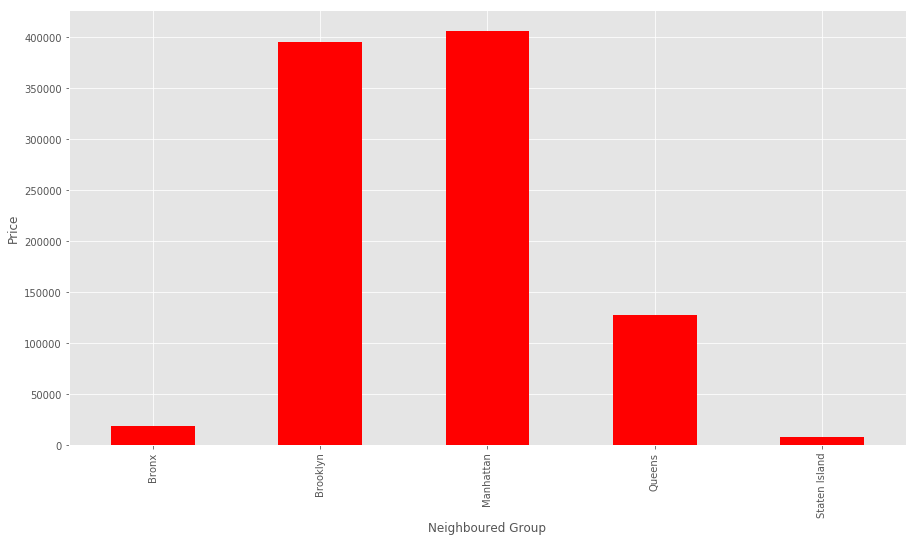

In [13]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

neighbourhood_GP = merge_listing_review.groupby('neighbourhood_group_cleansed').price.count()
neighbourhood_GP.plot(kind='bar', 
          x='neighbourhood_group_cleansed',
          y='price',
          color = '#ff0000', 
          figsize =(15,8), 
          legend = False)
plt.xlabel('Neighboured Group')
plt.ylabel('Price')

2 Now let's plot a graph of the pricing with room type that has been rented out.We can see from the plot that Entire Homes and Private Rooms had a higher price listed. We need to find out why is this that these room types are having more pricing.

Text(0,0.5,'Price')

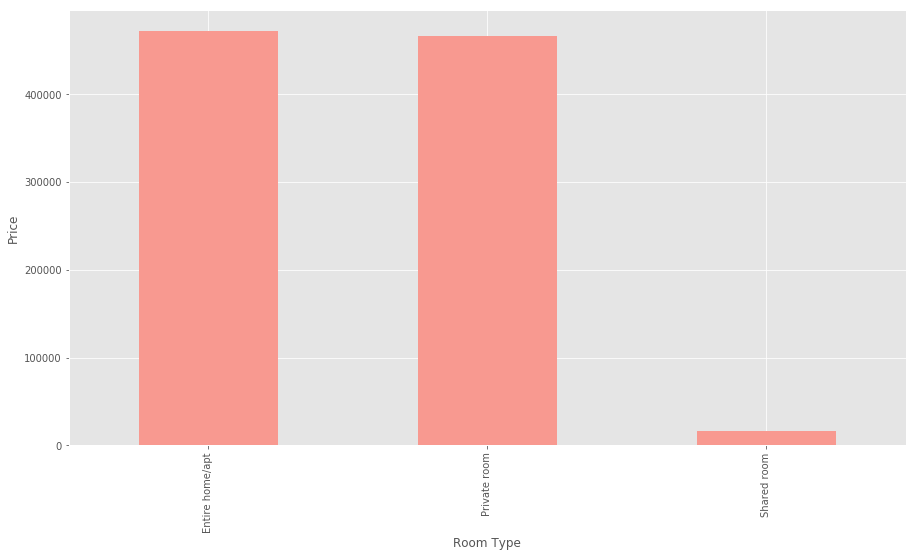

In [31]:
roomtype_gp = merge_listing_review.groupby('room_type').price.count()
roomtype_gp.plot(kind='bar', 
          x='room_type',
          y='price',
          color = '#f89990', 
          figsize =(15,8), 
          legend = False)
plt.xlabel('Room Type')
plt.ylabel('Price')

3  Now lets plot the graph of price along with number of bedrooms each lisiting has. It seems interesting that single bedrooms are fetching the maximum revenue for airbnb. This seems to be the most prefered choice. It could because the customers in New York are usually the business people or travellers who are okay with smaller places.

Text(0,0.5,'Price')

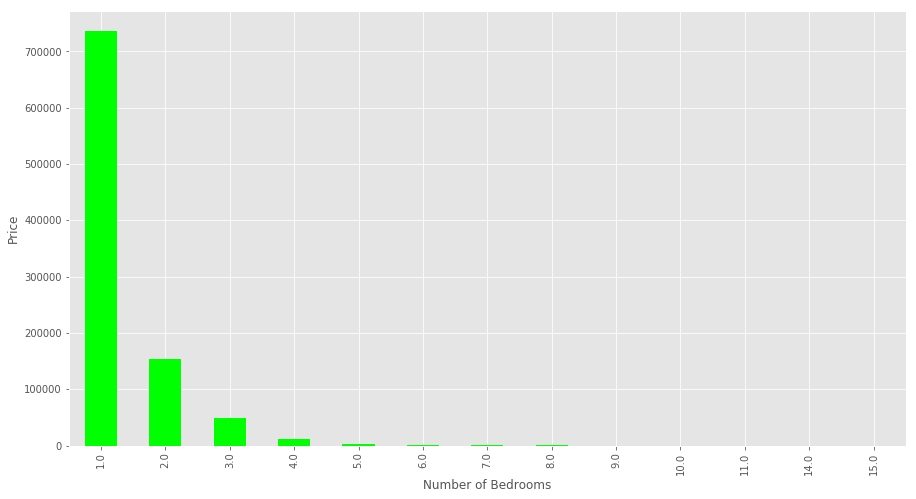

In [14]:
bedrooms_gp = merge_listing_review.groupby('bedrooms').price.count()
bedrooms_gp.plot(kind='bar', 
          x='room_type',
          y='Avg Price',
          color = '#00FF00', 
          figsize =(15,8), 
          legend = False)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')

4 Now lets plot a heatmap to analyse the relationship between Neighbourhood and Price with respect to the price of the listing.
We found out that the mean price for lesser number of bedrooms is less. 
We also found from the previous plot that single bedrooms are fetching the maximum revenue this shows that though the price is less that is fetching the maximum revenue shows the demand for single bedrooms.


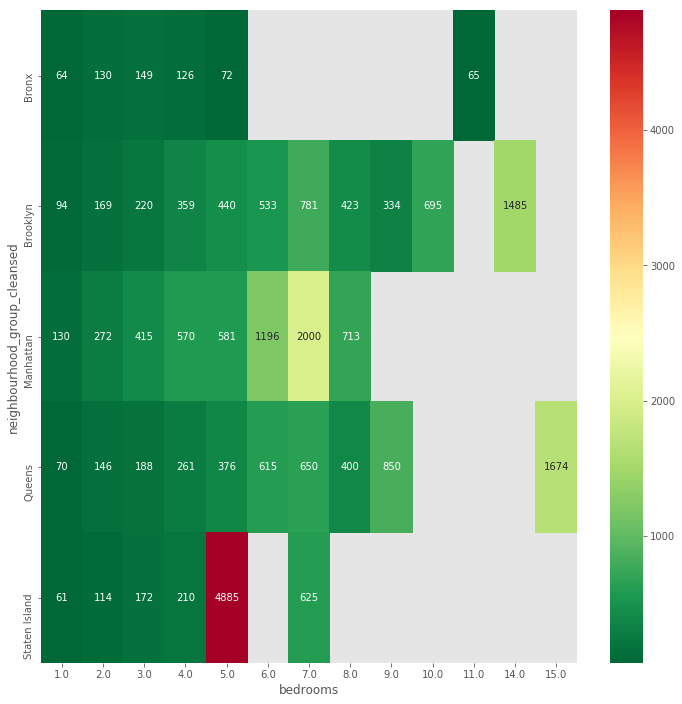

In [15]:
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(merge_listing_review.groupby([
        'neighbourhood_group_cleansed', 'bedrooms']).price.mean().unstack(),cmap = 'RdYlGn_r',annot=True, fmt=".0f")

Now lets just try to narrow down our focus to the neighbour hoods of Manhattan and Brooklyn by extracting just the data for those neighbour hood. We are doing this because those are the two neighbourhoods where we found out that prices were most expensive compared to other neighbourhoods.

In [16]:
manhattan_brooklyn = merge_listing_review[merge_listing_review['neighbourhood_group_cleansed'].isin(['Manhattan', 'Brooklyn'])]

In [17]:
manhattan_brooklyn['neighbourhood_group_cleansed'].unique()

array(['Manhattan', 'Brooklyn'], dtype=object)

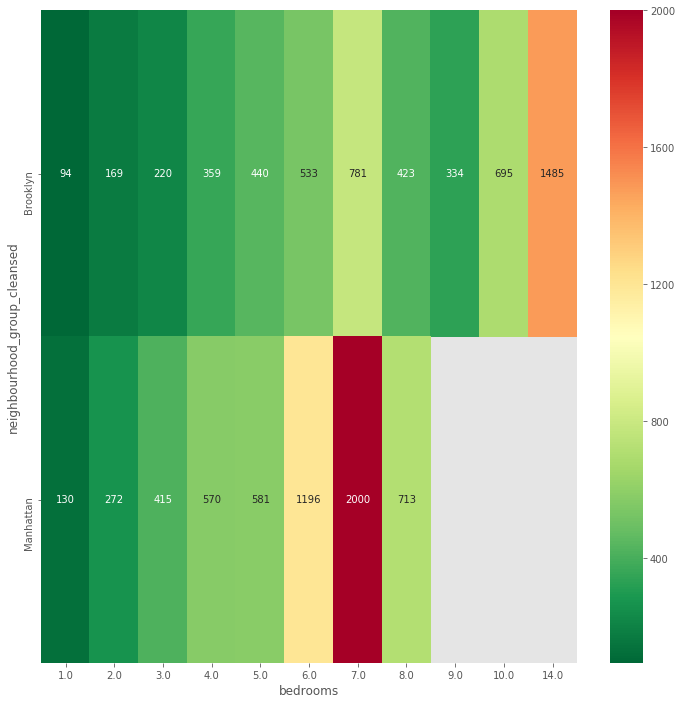

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(manhattan_brooklyn.groupby([
        'neighbourhood_group_cleansed', 'bedrooms']).price.mean().unstack(),cmap = 'RdYlGn_r',annot=True, fmt=".0f")

5 Now let's see if review scores ratings played any role in the price of those particular lisitings. For that we plot a scatter plot with review_scores_ratings vs price for Manhattan and Brooklyn.

C:\Users\prajw\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


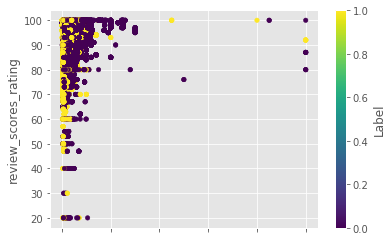

In [19]:
classmap = {}
for idx, name in enumerate(manhattan_brooklyn['neighbourhood_group_cleansed'].unique()):
    classmap[name] = float(idx)
manhattan_brooklyn['Label'] = manhattan_brooklyn['neighbourhood_group_cleansed'].apply(lambda x: classmap[x])
manhattan_brooklyn.plot.scatter(y = 'review_scores_rating', x = 'price',c = 'Label', colormap='viridis')

It is observed that the better review scores are for lesser prices properties ,showing that the guests look for economical options when they choose airbnb .Lesser price is basically appreciated. We need to check what is it that the high priced properties have in them making the price higher.

6 To do this we thought of analysing the description of these particular hosts who had listed their property. So the analysis of the description goes as follows. We have used the 'description' column.
Here we are trying to find the words that have maximum frequency. To find out the reasons for high prices.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prajw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prajw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prajw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


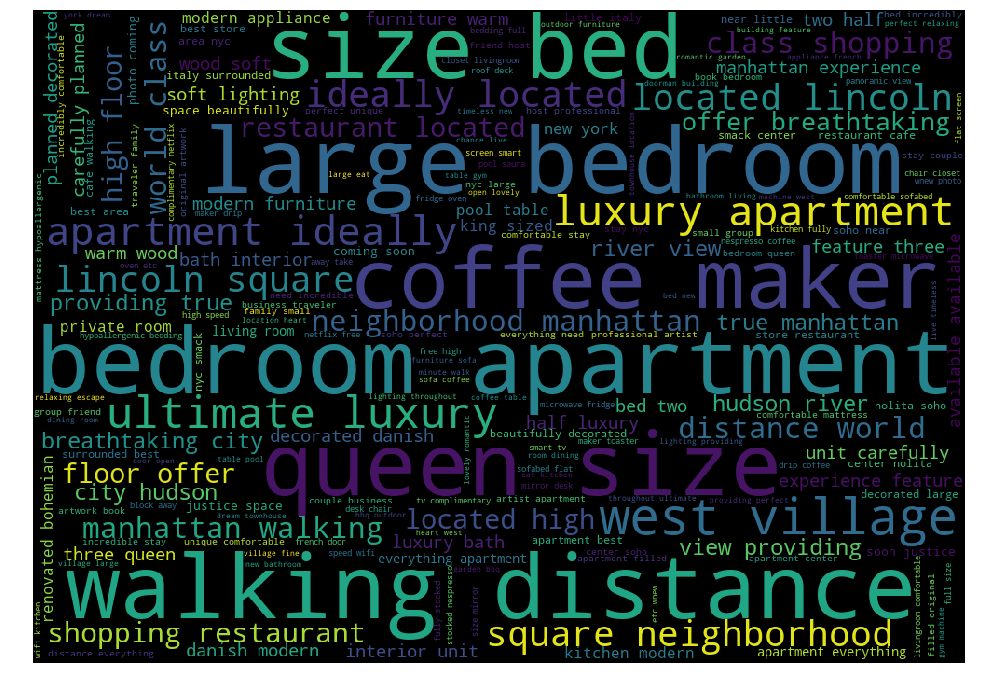

In [20]:
import nltk
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

des = manhattan_brooklyn[['description','price',]]
des = des[des['description']!=0]
des = des.sort_values('price',ascending=[0])
topresults = des[:50]

words=''
for index,row in topresults.iterrows():
    words += str(row['description'])
stopword_list = stopwords.words('english')  
characters=['0','1','2','3','4','5','6','7','8','9','\r','\n','',' ',"'s",'!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
characters.extend(stopword_list)
tokens=nltk.word_tokenize(words)
words_only = []
for l in tokens:
    if l not in characters:
        words_only.append(l.lower())

wnl = nltk.WordNetLemmatizer() 
final_data=[wnl.lemmatize(data) for data in words_only]
final_words=' '.join(final_data)

wordcloud = WordCloud(width = 1000, height = 700).generate(final_words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

As we can observe in the above word cloud that words such as <b>Queen Size</b>,<b>Walking Distance</b>,<b>Times Square</b>, <b>Coffee Maker</b>, <b>Danish Mordern</b>, etc.(all the key words that are in above image, the size of the word shows the frequency that it has occured) are the words used by the hosts in their description whose lisitings are expensive. Note that the above result is only for Manhattan and Brooklyn. This shows that people are willing to pay higher price for listings which are walking distance to particular locaition, provide better sleeping facilities.
Now this is something we wouldn't have guessed.
<h3></h3>
Bigger beds higher price, who would have guessed?

7 Lets do the same thing for reviewers comments right now. We will now look at the comments of the high paying customers.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prajw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prajw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prajw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


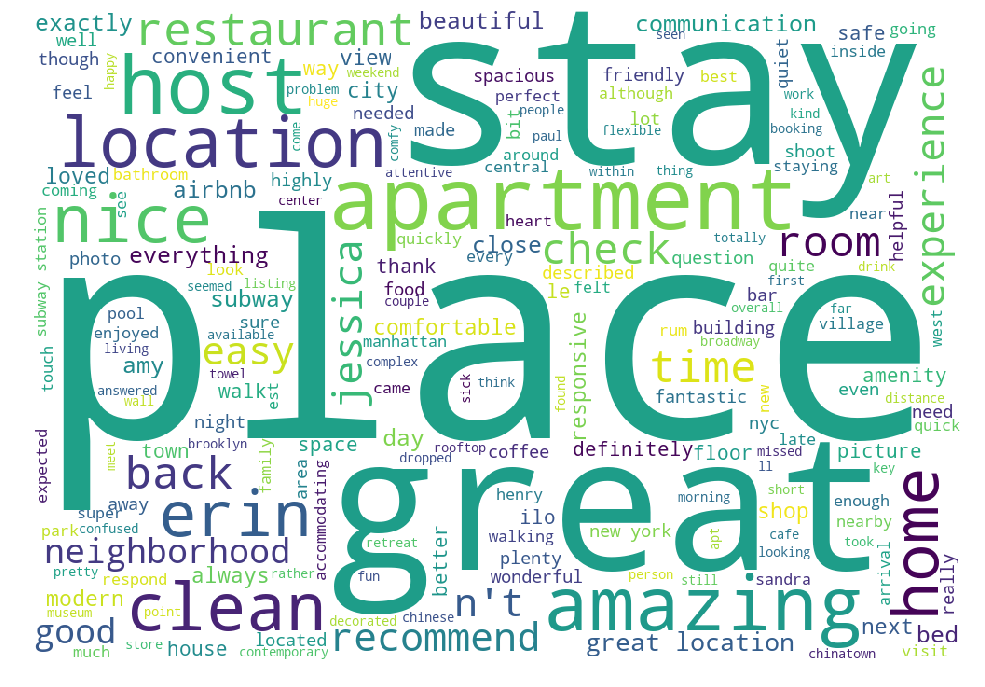

In [22]:
import nltk
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
words=''
com = manhattan_brooklyn[['comments','price',]]
com = com[com['comments']!=0]
com = com.sort_values('price',ascending=[0])
topresults = com[:50]
for index,row in topresults.iterrows():
    words += str(row['comments'])
stopword_list = stopwords.words('english')  
characters=['0','1','2','3','4','5','6','7','8','9','\r','\n','',' ',"'s",'!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
characters.extend(stopword_list)
tokens=nltk.word_tokenize(words)
words_only = []
for l in tokens:
    if l not in characters:
        words_only.append(l.lower())

wnl = nltk.WordNetLemmatizer() 
final_data=[wnl.lemmatize(data) for data in words_only]
final_words=' '.join(final_data)
wordcloud = WordCloud(background_color='white',width = 1000, height = 700).generate(final_words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


The above word could shows us the key words which are used by the customers in their reviews for the expensive hotel they stayed in giving us idea about why these lisitings would be expensive. All the words in the above image give us information about the quality of the expensive listings in Manhattan and Brooklyn. 
<h6>People are ready to pay higher prices for "CLEAN", "great locations","good views", "spacious", etc. precisely better asthetics</h6>

<h3>Analysis Part-II (Host Analysis) </h3>
Analysis from Host's point of view.

In the first analysis we tried to find out the reasons why a particular lisiting is expensive.Now lets see what are the factors affecting the success of a host. What are the ways that a host can become a super host (A super host is a tag given by airbnb to reliable and successful hosts similar to prime in amazon) and how a host can earn more.

In [23]:
listing_detailed = pd.read_csv('listings_detailed.csv')
HostInfo=listing_detailed[['host_id','house_rules', 'host_since', 'host_location',
      'host_about', 'host_response_time', 'host_response_rate',
      'host_acceptance_rate', 'host_is_superhost',
      'host_picture_url', 'host_neighbourhood', 'host_listings_count',
      'host_total_listings_count', 
      'host_has_profile_pic', 'host_identity_verified','interaction','cleaning_fee','review_scores_accuracy', 'review_scores_cleanliness',
      'review_scores_checkin', 'review_scores_communication',
      'review_scores_location', 'review_scores_value', 'requires_license','review_scores_rating']]

C:\Users\prajw\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (43,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Lets extract just the information about the host by extracting only those attributes

In [24]:
HostInfo.host_is_superhost.replace(['t', 'f'], [1, 0], inplace=True)
HostInfo.fillna(0,inplace=True)

C:\Users\prajw\Anaconda3\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\prajw\Anaconda3\lib\site-packages\pandas\core\frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


1) Let's plot a scatter plot to see if there is any relation between host type and review score rating.

C:\Users\prajw\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


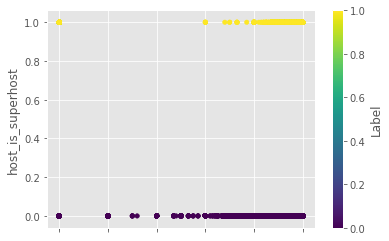

In [25]:
classmap = {}
for idx, name in enumerate(HostInfo['host_is_superhost'].unique()):
    classmap[name] = float(idx)
HostInfo['Label'] = HostInfo['host_is_superhost'].apply(lambda x: classmap[x])
HostInfo.plot.scatter(y = 'host_is_superhost', x = 'review_scores_rating', c='Label', colormap='viridis')

As it is evident from the above plot,review scores ratings are not related to the type of the host.


2) Now lets see if a the year of joing of a host has anything to do with being or not being a super host. 

In [27]:
good_data = HostInfo.loc[HostInfo['host_total_listings_count']<30]
df = HostInfo.loc[HostInfo['host_is_superhost']==1]
neighbourhood_GP = df.groupby('host_neighbourhood').host_id.count()
neighbourhood_count = neighbourhood_GP.reset_index()
neighbourhood_count['host_id'] = neighbourhood_count.rename(columns={'host_id':'count'}, inplace=True)
neighbourhood_count.sort_values('count', ascending=[0]).head()
neighbourhood_count = neighbourhood_count[neighbourhood_count['count']<853]
neighbourhood_count.sort_values('count', ascending=[0]).reset_index()
df['year'] = df['host_since'].apply(lambda x : x[:4])
df.groupby('year').count()

C:\Users\prajw\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,host_id,house_rules,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_picture_url,...,cleaning_fee,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,review_scores_rating,Label
year,,,,,,,,,,,,,,,,,,,,,
2008,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
2009,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,61
2010,262,262,262,262,262,262,262,262,262,262,...,262,262,262,262,262,262,262,262,262,262
2011,556,556,556,556,556,556,556,556,556,556,...,556,556,556,556,556,556,556,556,556,556
2012,890,890,890,890,890,890,890,890,890,890,...,890,890,890,890,890,890,890,890,890,890
2013,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,...,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022
2014,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,...,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
2015,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,...,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210
2016,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,...,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061


As we can see in the above table, hosts who have joined in the year 2013, 2014, 2015, 2016 and 2017 have become superhosts. 

<h4>Now we will try to find out ways to make a host a successful host :)</h4>

<h4>Brief Explanation of what we would be doing below:</h4>
Firstly we have filtered the attributes that we need for analysis. Attributes like 'description','property_type','room_type', 'accommodates',
    'bathrooms', 'bedrooms', 'beds', 'square_feet',
    'price', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
    'availability_365', 'reviews_per_month', 'latitude', 'longitude', 'bed_type'.
    These are the attributes that would help us find the corelation between price for each host. There was one missing attribute which we had to calculate ourselves, that was total revenue generated in one year by each host. We calculated that by making use of the following formula.
   <h6>YEARLY REVENUE =  AVERAGE LENGTH OF STAY X PRICE X NO. OF REVIEWS/MTH X REVIEW RATE X 12 MONTHS</h6>
   
 We added this attribute to our data frame under the column 'revenue'. Now that we have these attributes which are effecting the price and the annual revenue for each host, we tired to find out relationship between them. To do so we firstly began with a linear model, that is we made of Linear Regression and got a variance score of 0.34. Linear Regression didn't perform very well, due to which we tried using Random Forest Regressor which gave a variance score of 0.50 which is not bad but still not very good. We can futher improve the accuracy using features that are extracted from the description of each and every host.

In [76]:
import pandas as pd
import os
import re
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [46]:
df = pd.read_csv('listings_detailed.csv')

C:\Users\prajw\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (43,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Lets grab the columns we are interested in.

In [47]:
df.shape


(50041, 96)

In [48]:
imp = [
    'description', 
    'property_type', 'room_type', 'accommodates',
    'bathrooms', 'bedrooms', 'beds', 'square_feet',
    'price', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
    'availability_365', 'reviews_per_month', 'latitude', 'longitude', 'bed_type'
]
df = df[imp]
fetures = ['cleaning_fee', 'extra_people', 'price']
df[fetures] = df[fetures].replace('[\$,]', '', regex=True)
df[fetures] = df[fetures].apply(pd.to_numeric, errors='coerce')

Lets clean the data and keep the values of availability only from 60-360 days. As the hosts who are less then 60 days would give us a negative result. Also remove the prices who are greater than 1000, it should moslty be an outlier.

In [50]:
df['availability_365'].dropna()
df = df.query('60 <= availability_365 <= 300')
df['availability_365'].dropna()
df = df.drop('availability_365', axis = 1)
#
condition = df[df['price'] > 1000]
rows_to_drop = condition.index
df = df.drop(rows_to_drop, axis=0)
df['price'].dropna()
print("cleaned")

cleaned


As we dont have the amount of revenue each host generates in one year, lets try to estimate that so that we can have the total revenues earned by the hosts. While I was going through various analysis I found out this formula to calculate the total revenue based on the data that we already have. 
<h6>AVERAGE LENGTH OF STAY X PRICE X NO. OF REVIEWS/MTH X REVIEW RATE X 12 MONTHS</h6>

In [51]:
rename = ['Guest suite', 'Bed and breakfast','Guesthouse','Bungalow','Hotel','Hostel','Resort','Boutique hotel'
                        ,'Villa','Tiny house','Boat','Aparthotel','Tent','Camper/RV','Cottage','Nature lodge'
                        ,'Casa particular (Cuba)','Castle']
df['property_type'].loc[df['property_type'].isin(rename)] = 'Other'

C:\Users\prajw\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [52]:
df['bed_type'].unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Airbed', 'Couch'],
      dtype=object)

In [53]:
rename = ['Pull-out Sofa', 'Futon', 'Couch', 'Airbed']
df['bed_type'].loc[df['bed_type'].isin(rename)] = 'Non-Real Bed'

C:\Users\prajw\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [54]:
avg_length_of_stay_newyork = 4
rate = 0.5
df['price'] = df['price'] + df['cleaning_fee']
df['revenue'] = avg_length_of_stay_newyork * df['price'] * (df['reviews_per_month'] / rate) * 12
df = df.drop(['cleaning_fee'], axis = 1)

Now we have the revenue column in our data frame for each and every host.

In [57]:
df['revenue'].describe()

count     11463.000000
mean      40536.840995
std       47794.066218
min          79.680000
25%        8933.760000
50%       24120.000000
75%       54862.560000
max      542880.000000
Name: revenue, dtype: float64

<h4> Handling the missing numerical values:</h4>To fill the missing values with values that makes sense such as most common values or with the mean of the column. I made use of the following piece of code that I found on github to fill the missing values. There are missing values for various numerical values in our data frame. If we directly replace it with 0 or maximum value it won't be right as it would mess up with our model and an incorrect relationship would be found between the attributes. To avoid such problems we wrote the follwing class to make use of TransformerMixin class from sklearn which help us find all the numerical values in the dataframe and replace them with the median.

In [60]:
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):
       
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [61]:
df = df.dropna(subset=['revenue'])
df = df.drop('square_feet', axis=1)
cat_feats = df.select_dtypes(include=['object']).columns
df[cat_feats] = DataFrameImputer().fit_transform(df[cat_feats])

# Put median for numerical features
num_feats = df.select_dtypes(include=[np.number]).columns
imp = Imputer(missing_values=np.nan, strategy='median', axis=0)
df[num_feats] = imp.fit_transform(df[num_feats])

df.shape


(11463, 16)

In [63]:
cols_to_drop = ['price', 'reviews_per_month']
df_final_viz = df[cols_to_drop]
df = df.drop(cols_to_drop, axis = 1)


Dataset has 11463 rows, 14 columns.


Extract the description of all the hostings and put that into corpus and drop the description section. We shall use this corpus to analyse description of the host listings on Airbnb.

In [64]:
corpus = df[['description']]
df = df.drop(['description'], axis = 1)

In [72]:
# categorical_feats = ['property_type', 'room_type', 'bed_type']
# df = pd.get_dummies(df, columns=categorical_feats, drop_first=False)

<h4>Trying out different Machine Learning Models:</h4>Lets separate out the labels from the dataframe. In our case those are the revenues generated by each host. We will treat these revenues for each host a the target value or the label of that entry in the data frame. Drope that column from the main dataframe as we would be dividing that into testing and training data set.
<h4>Spliting of the data set:</h4>
Once we have removed our revenue columns from the data frame now we will split this data frame into training and testing data in the ratio of 70-30. Also the data has been shuffled while building training and testing data.
<h4>Trying out Linear Regression Model: </h4>
Now that we have created training and testing data. We will try to train the Linear Model using the training data that we have created. We have made use of the linear models from the sklearn library to train the linear regression model. Once we train the model we tried testing with the test data that we have formed. Testing this model gave us a variance score of 0.34. The variance score of 1 is assumed to be perfect.

<h4>Trying Random Forest Regressor:</h4>
We have made use of Random forest regressor from the sklearn library  and trained our model with the training data that we have created. Later we tested the model with the testing data which gave us an r2_score also known as variance score of 0.50 which was better than Linear Model. This was pretty good to make approximate guesses of the revenues.

In [73]:
target = 'revenue'
X = df.drop(target, axis=1)
y = df[target]

Let's split the data into training and testing data in 70 - 30 ratio.

In [98]:
seed=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

Now lets find the relationship between the attributes and the revenue generated using Linear Regression Model.

In [78]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
# Make predictions using the testing set
pred = regr.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test,pred))
print('Variance score: %.2f' % r2_score(y_test, pred))

Mean squared error: 1508092818.68
Variance score: 0.34


The variance score of 1 is a perfect score. Linear models do not work very well due to which we got a score of 0.34 which is pretty less. Lets try to find out the relationship using different model like Random Forest Regressor. 

In [99]:
random_f = RandomForestRegressor(random_state=seed, bootstrap=True, criterion='mse', max_depth=10, 
                           max_features='auto', min_samples_split=4, n_estimators=150)

random_f.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [83]:
ran_pred = random_f.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, ran_pred))
print('Variance score: %.2f' % r2_score(y_test, ran_pred))

Mean squared error: 1130913724.68
Variance score: 0.50


Random forest did a pretty good job and gave us a variance score of 0.50 which is not that bad. So finally we will use random forest to make estimations of revenue for the new hosts.


<h4>Future Scope:</h4>
If we continue to work on this project further, we would like to include features extracted from the description of the lisitings in our machine learining model to improve our accuracy. 